<b><center>World`s Hapiness Score

<b><h3>Documentation

<i><li>1. Checking for Null Values, Duplicates, Datatypes & Statistical description using Describe()
<li>2. Plotting a Pairplot & Correlation Heatmap (We Observer Happiness Score is Output Variable)
<li>3. Correlation Coefficient & Determination & RegPlot for Each Independant Variable with Target Variable

<i>A.) Find Top 15 Countries by Happiness Score
   <li> Group by Country
   <li> Aggregate the field you need, Like Hapiness Score, GDP & Year
   <li> Scatter Plot Using Colors and Size
       
B.) Compare the Difference between 2015-2017 Happiness Score
   <li> Group by Year & Split into 3 Data Set
   <li> Remove the uneven Listed Countries


<I> Regression Modelling 
    <li>Linear Regression & Evaluation(MSE, MAE, R2)
    <li>Linear Regression using Train_Test_Split
    <li>XGBoosting & Gradient Boosting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('World_Happiness_2015_2017_.csv')
df.head()

Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
0  Switzerland               1            7.587                   1.39651   
1      Iceland               2            7.561                   1.30232   
2      Denmark               3            7.527                   1.32548   
3       Norway               4            7.522                   1.45900   
4       Canada               5            7.427                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  Year  
0     0.29678            2.51738  2015  
1     0.43630            2.70201  2015  
2     0.34139            2.49204  2015  
3     0.34699            2.46531  2015  
4     0.45811            2.45176  2015

Observing the Data Set, it  states there are 7 Columns Determining the Happiness Score-
Economic Production, Family, Life Expectancy, Freedom, No Corruption, Genrosity, Minor Problems(Benchamrk)

In [4]:
df['Year'].value_counts()

2015    158
2016    157
2017    155
Name: Year, dtype: int64

In [5]:
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

Happiness Rank  Happiness Score  Economy (GDP per Capita)      Family  \
count      470.000000       470.000000                470.000000  470.000000   
mean        78.829787         5.370728                  0.927830    0.990347   
std         45.281408         1.136998                  0.415584    0.318707   
min          1.000000         2.693000                  0.000000    0.000000   
25%         40.000000         4.509000                  0.605292    0.793000   
50%         79.000000         5.282500                  0.995439    1.025665   
75%        118.000000         6.233750                  1.252443    1.228745   
max        158.000000         7.587000                  1.870766    1.610574   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                470.000000  470.000000                     470.000000   
mean                   0.579968    0.402828                       0.175605   
std                    0.240161    0.150356                       0.131909   
min                    0.000000    0.000000                       0.000000   
25%                    0.402301    0.297615                       0.075792   
50%                    0.630053    0.418347                       0.139081   
75%                    0.768298    0.516850                       0.249839   
max                    1.025250    0.669730                       0.838075   

       Generosity  Dystopia Residual         Year  
count  470.000000         470.000000   470.000000  
mean     0.201426           2.092717  2015.993617  
std      0.133211           0.565772     0.816907  
min      0.000000           0.328580  2015.000000  
25%      0.098303           1.737975  2015.000000  
50%      0.181624           2.094640  2016.000000  
75%      0.275505           2.455575  2017.000000  
max      0.819710           3.837720  2017.000000

In [8]:
df.shape

(470, 11)

In [9]:
#Checking Data Type of Each Column
df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [10]:
#Lets Convert Year to Float
df['Year'] = df['Year'].astype(np.float64)


In [11]:
df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

In [12]:
#Converting Back to int
df['Year'] = df['Year'].astype(np.int32)

In [13]:
df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int32
dtype: object

subplot_adjust is used to adjust size of these smaller plots

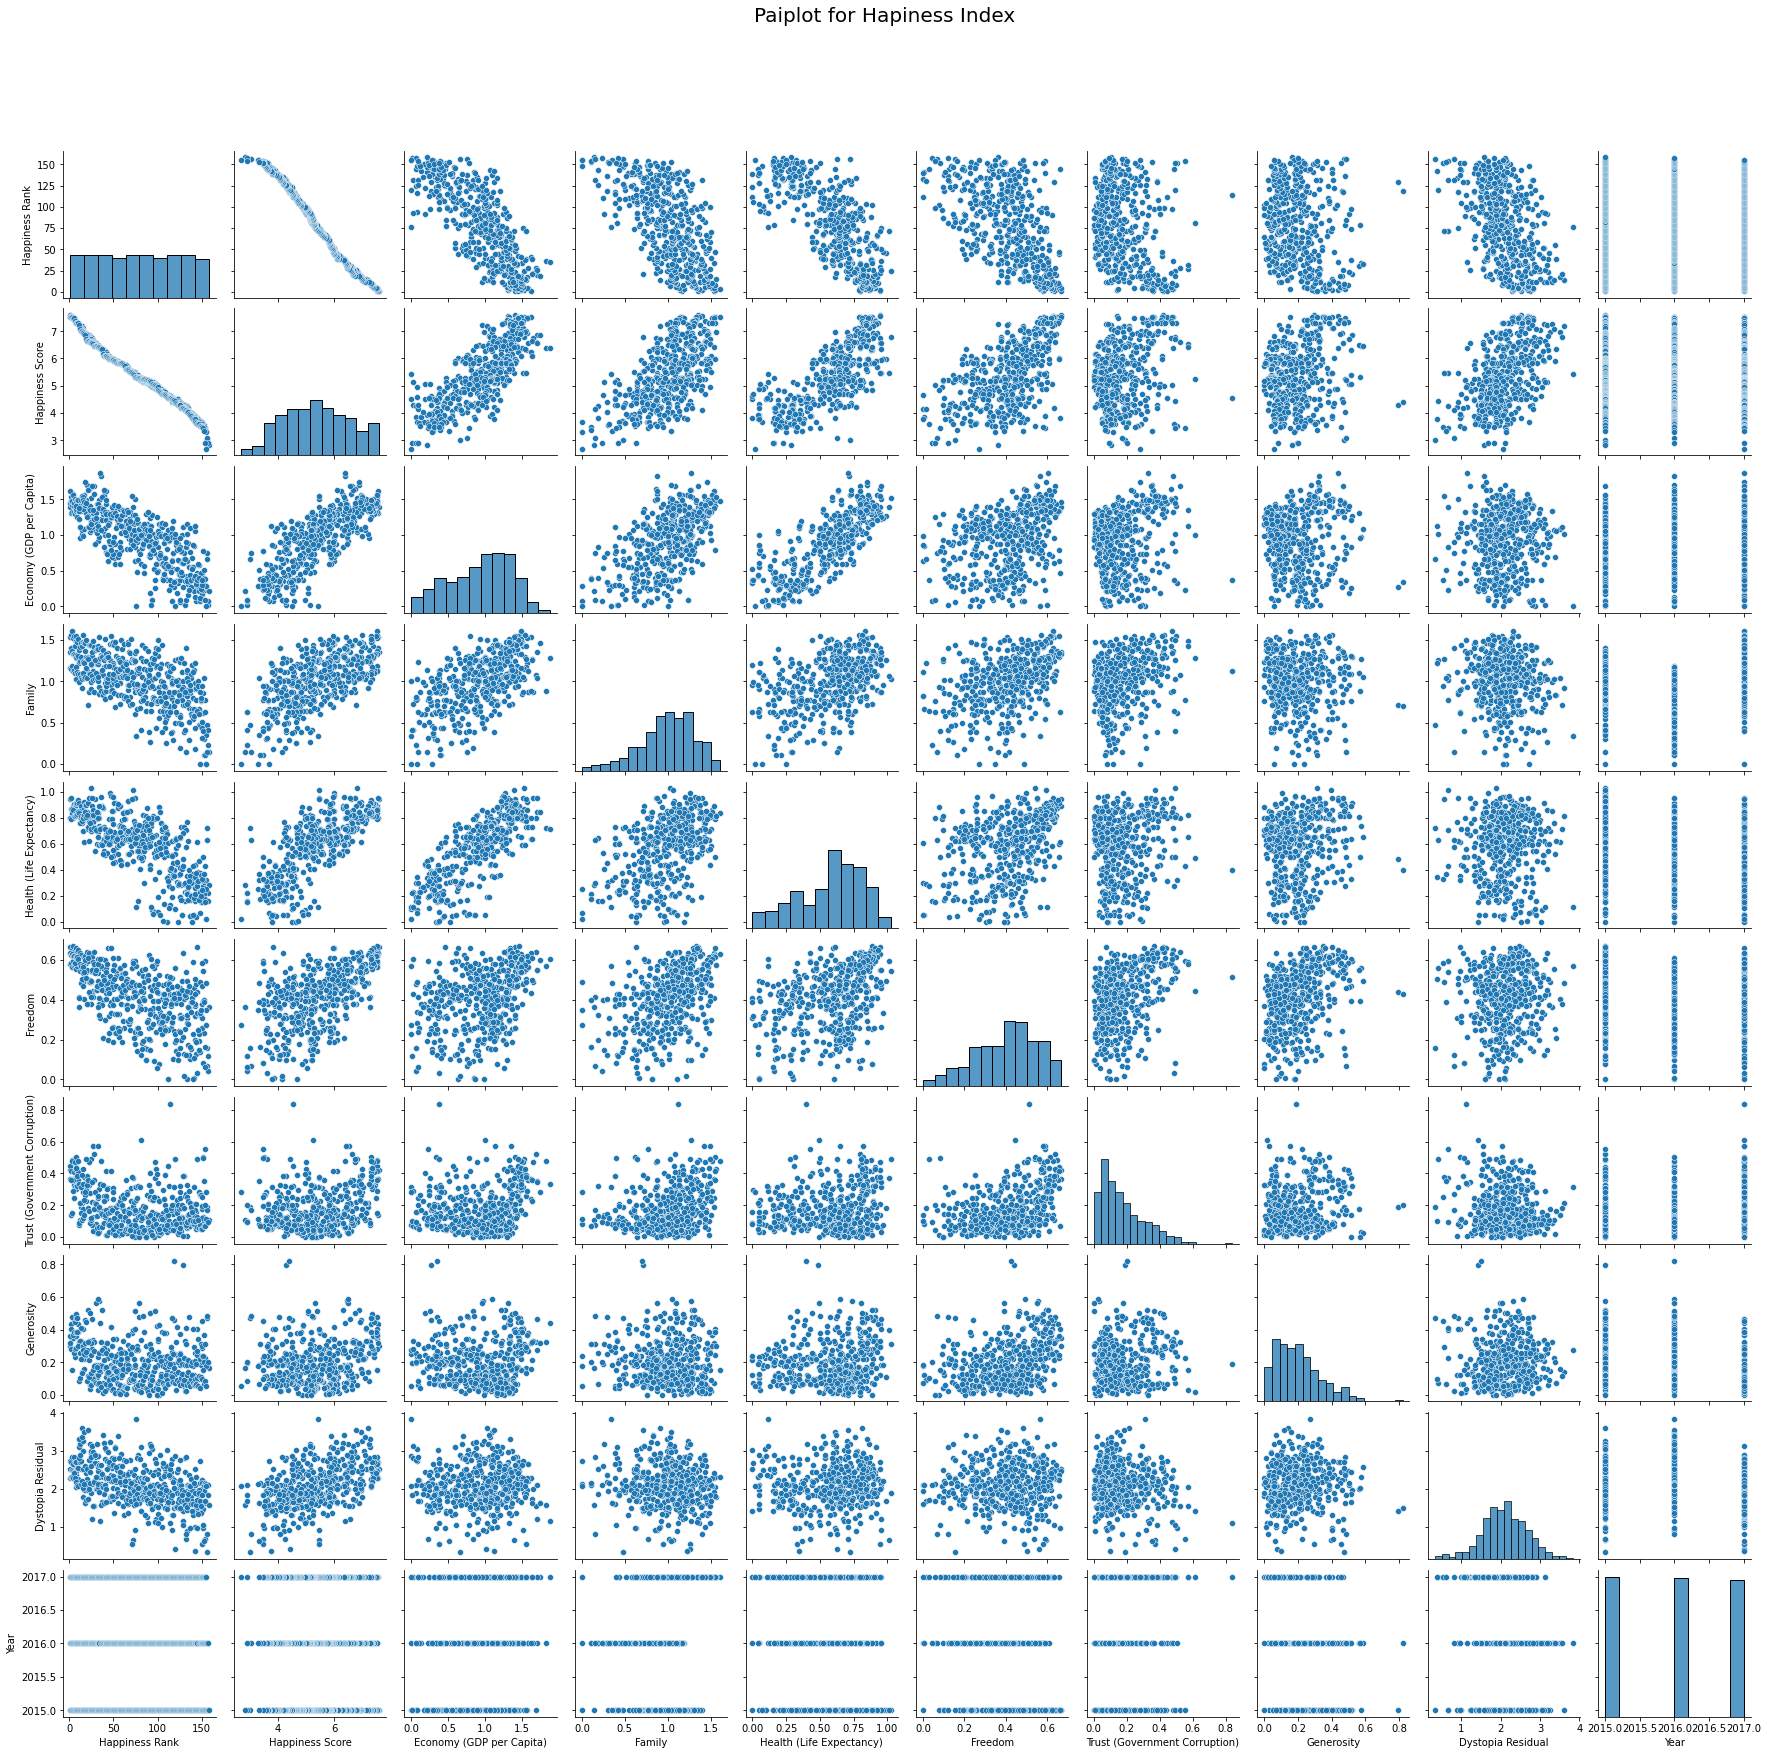

In [14]:
#Since No Null values, No Problem with Data, Lets Plot
plotsns = sns.pairplot(df)
plotsns.fig.suptitle('Paiplot for Hapiness Index', fontsize=20)

plotsns.fig.subplots_adjust(top=0.9)


We see a strong corelation between Hapiness Score and Hapiness Rank, Because Score predicts the Rank here
Now We will be Drilling down to Observe plots between Hapiness Score and Other attributes

<AxesSubplot:>

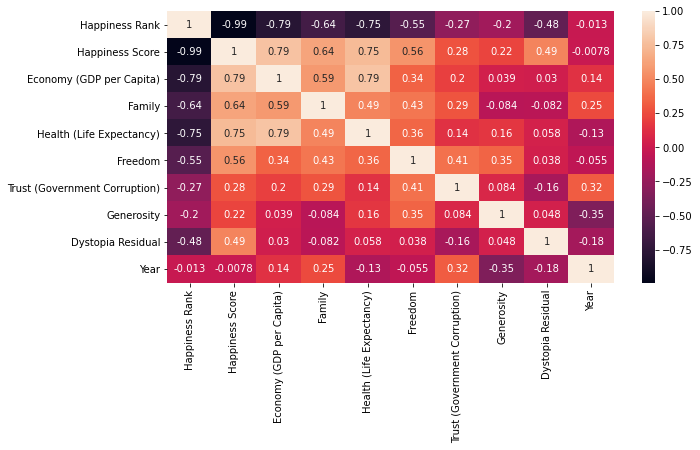

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

<b><h3>1. Finding Corelation and R2 for Variance and impact of values on Hapiness Score

<B>Happiness Score vs Economy

In [16]:
#Create a Data set including only Hapiness Score and Economy
eco_df = df[['Happiness Score','Economy (GDP per Capita)']]

In [17]:
eco_df.corr()

Happiness Score  Economy (GDP per Capita)
Happiness Score                   1.00000                   0.78545
Economy (GDP per Capita)          0.78545                   1.00000

Calculate Rsquare & R

In [18]:

r=eco_df.corr().iloc[1,0]
print('Corelation Coefficient :' + str(r))

R2= np.round(r**2,2)
print('R-Squared Value :' + str(R2))

Corelation Coefficient :0.785449639956171
R-Squared Value :0.62


R-square Value is 0.62 , that means 62 % Variation can be explained by the help of Economic GDP

Text(0.5, 1.0, 'Correlation between Hapiness Score vs Economy')

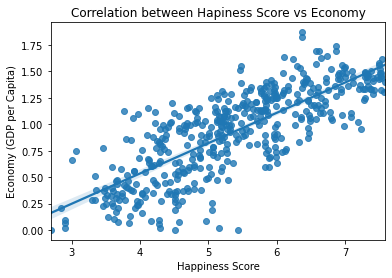

In [19]:
eco_fig = sns.regplot(data=eco_df,x='Happiness Score',y='Economy (GDP per Capita)')

eco_fig.set_title("Correlation between Hapiness Score vs Economy")

Regplot of SNS Requires
<li>1.Data
<li>2.X Value
<li>3.Y Value

<b>Happiness Score vs Family

In [20]:
fam_df=df[['Happiness Score','Family']]
fam_df.head()


Happiness Score   Family
0            7.587  1.34951
1            7.561  1.40223
2            7.527  1.36058
3            7.522  1.33095
4            7.427  1.32261

In [21]:
fam_df.corr()

Happiness Score    Family
Happiness Score         1.000000  0.636532
Family                  0.636532  1.000000

In [22]:
R=fam_df.corr().iloc[1,0]
print('Coefficient of Corealtion : '+str(R))

R2=np.round(R**2,2)
print('R-Squared Value : ' + str(R2))

Coefficient of Corealtion : 0.636531962001542
R-Squared Value : 0.41


R-squared Value says that only 41% of variance can be predicted using Family Scores

Text(0.5, 1.0, 'Corelation between Happiness Score vs Family')

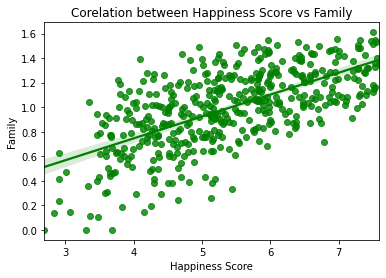

In [23]:
fam_fig = sns.regplot(data=fam_df, x='Happiness Score', y='Family', color='Green')

fam_fig.set_title('Corelation between Happiness Score vs Family')


In [24]:
#Renaming the column of Health
df=df.rename(columns={'Health (Life Expectancy)':'Life Expectancy'})

In [25]:
life_df=df[['Happiness Score','Life Expectancy']]

In [26]:
life_df.corr()

Happiness Score  Life Expectancy
Happiness Score          1.00000          0.74804
Life Expectancy          0.74804          1.00000

In [27]:
R=life_df.corr().iloc[1,0]
print('Corelation Coefficient : '+str(np.round(R,3)))

R2 = np.round(R**2,2)
print('R-Square Value : '+str(R2))

Corelation Coefficient : 0.748
R-Square Value : 0.56


It Concludes Life Expectancy can predict the 56% variance in the Score

Text(0.5, 1.0, 'Corelation of Happiness Score vs Life Expectancy')

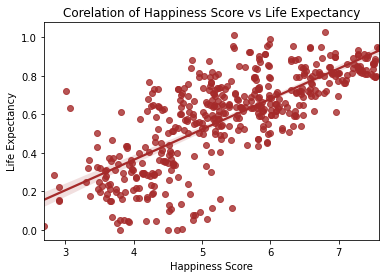

In [28]:
life_fig= sns.regplot(data=life_df, x='Happiness Score', y='Life Expectancy', color='Brown')
life_fig.set_title('Corelation of Happiness Score vs Life Expectancy')

<b>Happiness Score vs Freedom

In [29]:
df= df.rename(columns={'Freedom':'Liberty'})

In [30]:
lib_df = df[['Happiness Score','Liberty']]
lib_df.corr()

Happiness Score   Liberty
Happiness Score         1.000000  0.560353
Liberty                 0.560353  1.000000

In [31]:
R = lib_df.corr().iloc[1,0]
print('Corelation Coefficient : '+str(np.round(R,3)))

R2 = np.round(R**2,2)
print('R-Square Value : '+str(R2))

Corelation Coefficient : 0.56
R-Square Value : 0.31


Freedom/Liberty predicts only 31% variance in the Score

Text(0.5, 1.0, 'Corelation of Happiness Score vs Liberty')

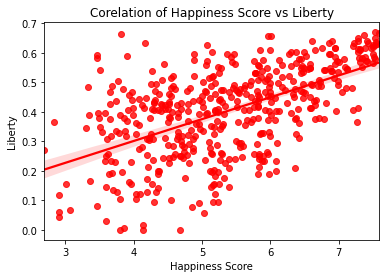

In [32]:
lib_fig = sns.regplot(data=lib_df, x='Happiness Score', y='Liberty',color='red')
lib_fig.set_title('Corelation of Happiness Score vs Liberty')

In [33]:
df=df.rename(columns={'Trust (Government Corruption)':'Corruption'})
cor_df = df[['Happiness Score','Corruption']]
cor_df.corr()

Happiness Score  Corruption
Happiness Score          1.00000     0.28213
Corruption               0.28213     1.00000

In [34]:
R= cor_df.corr().iloc[1,0]
print('Coefficient Corelation : ' + str(np.round(R,3)))

R2= np.round(R**2,2)
print('R-square Value : '+str(R2))

Coefficient Corelation : 0.282
R-square Value : 0.08


Pretty Weak Correlation and Rsquare predicts only 8% of variance

Text(0.5, 1.0, 'Corelation of Happiness Score vs Corruption')

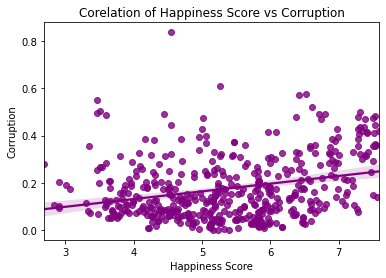

In [35]:
cor_fig = sns.regplot(data=cor_df, x='Happiness Score', y='Corruption', color='purple')
cor_fig.set_title('Corelation of Happiness Score vs Corruption')

Some countries are way to unhappy with the corruption

<b>Happiness Score vs Genrosity

In [36]:
gen_df = df[['Happiness Score','Generosity']]
gen_df.corr()

R=np.round(gen_df.corr().iloc[1,0],3)
print('Corelation Coefficient : '+str(R))

R2= np.round(R**2,2)
print('R-Square Value : '+str(R2))

Corelation Coefficient : 0.222
R-Square Value : 0.05


Text(0.5, 1.0, 'Corelation between Happiness Score vs Generosity')

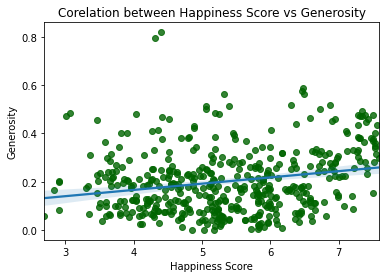

In [37]:
gen_fig = sns.regplot(data=gen_df, x='Happiness Score', y='Generosity', scatter_kws={"color":'darkgreen'})
gen_fig.set_title('Corelation between Happiness Score vs Generosity')

<b>Happiness Score vs Dystopia Residual

In [38]:
dys_df = df[['Happiness Score','Dystopia Residual']]
dys_df.corr()

R=np.round(dys_df.corr().iloc[1,0],3)
print('Corelation Coefficient : '+str(R))

R2= np.round(R**2,2)
print('R-Square Value : '+str(R2))

Corelation Coefficient : 0.49
R-Square Value : 0.24


Only 24% Variation can be predicted using Dystopia Residual

Text(0.5, 1.0, 'Corelation Between Happiness Score vs Dystopia Residual')

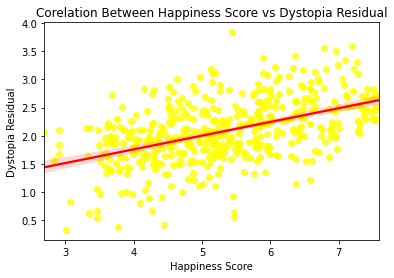

In [39]:
dys_fig = sns.regplot(data=dys_df, x='Happiness Score', y='Dystopia Residual', scatter_kws={"color": "yellow"}, line_kws={"color": "red"})
dys_fig.set_title('Corelation Between Happiness Score vs Dystopia Residual')

<i>A correlation coefficient between 0.25 and 0.5 is considered to be a “weak” correlation between two variables.

<b><center>Basic EDA Ended, Now Visualisation Starts

<b><h3>2. Finding the Top 15 Happiest Countries

These countries will first be-
<li>Grouped by Countries
<li>Aggregated by Fields required
<li>Sorted by Happiness Score

In [40]:
df_grouped = df.groupby('Country')['Happiness Score', 'Year', 'Economy (GDP per Capita)'].max()

In [41]:
df_grouped.head()

Happiness Score  Year  Economy (GDP per Capita)
Country                                                     
Afghanistan            3.794  2017                  0.401477
Albania                4.959  2017                  0.996193
Algeria                6.355  2017                  1.091864
Angola                 4.033  2017                  0.858428
Argentina              6.650  2017                  1.185295

In [42]:
df_grouped = df_grouped.sort_values('Happiness Score', ascending=False)
df_top15_grouped = df_grouped.iloc[0:15,:]

In [43]:
df_grouped.index

Index(['Switzerland', 'Iceland', 'Norway', 'Denmark', 'Finland', 'Canada',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia',
       ...
       'Afghanistan', 'Tanzania', 'Madagascar', 'Central African Republic',
       'Benin', 'Guinea', 'Rwanda', 'Togo', 'Syria', 'Burundi'],
      dtype='object', name='Country', length=166)

In [44]:
fig_10 = px.scatter(df_top15_grouped, x=df_top15_grouped.index, y='Happiness Score',
                    template='xgridoff',
                    size='Economy (GDP per Capita)',
                    color=df_top15_grouped.index,
                    animation_frame='Year')

fig_10.show()

<li><b>GDP vs Happiness Score for Each Year

In [45]:

fig = px.scatter(df,
                x='Economy (GDP per Capita)',
                y='Happiness Score',
                color=df['Country'],
                animation_frame=df['Year'],
                size = df['Liberty'],
                template = 'xgridoff',
                title = 'GDP vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates Liberty)')
fig.show()


#Here Template xgridoff = sns.set_style(white)

<li><b>What is the impact of Family on Happiness Scores

In [46]:
fig = px.scatter(df,
                x='Family',
                y='Happiness Score',
                color=df['Country'],
                animation_frame=df['Year'],
                size = 'Economy (GDP per Capita)',
                template = 'xgridoff',
                title = 'Family vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

<li><b>Does Freedom Excites ?

In [47]:
fig = px.scatter(df,
                x='Liberty',
                y='Happiness Score',
                color=df['Country'],
                animation_frame=df['Year'],
                size = 'Economy (GDP per Capita)',
                template = 'xgridoff',
                title = 'Family vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

<li><b>Impact of Life Expectancy on Happiness Score

In [48]:
fig = px.scatter(df,
                x='Life Expectancy',
                y='Happiness Score',
                color=df['Country'],
                animation_frame=df['Year'],
                size = 'Economy (GDP per Capita)',
                template = 'xgridoff',
                title = 'Family vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

<b><h3>3. How countries happiness has changed from 2015 to 2017?

<b>Ah ! I split Data set by Rows(Year-Group Unique values) - 2015, 2016, 2017
    <li>Resetting the Index also

In [49]:
grouped = df.sort_values('Year').groupby('Year')


df_year2015 = grouped.get_group(2015)
df_year2016 = grouped.get_group(2016)
df_year2017 = grouped.get_group(2017)

df_year2015 = df_year2015.sort_values('Country')
df_year2016 = df_year2016.sort_values('Country')
df_year2017 = df_year2017.sort_values('Country')



In [50]:
df_year2016

Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
311  Afghanistan             154            3.360                   0.38227   
266      Albania             109            4.655                   0.95530   
195      Algeria              38            6.355                   1.05266   
298       Angola             141            3.866                   0.84731   
183    Argentina              26            6.650                   1.15137   
..           ...             ...              ...                       ...   
201    Venezuela              44            6.084                   1.13367   
253      Vietnam              96            5.061                   0.74037   
304        Yemen             147            3.724                   0.57939   
263       Zambia             106            4.795                   0.61202   
288     Zimbabwe             131            4.193                   0.35041   

      Family  Life Expectancy  Liberty  Corruption  Generosity  \
311  0.11037          0.17344  0.16430     0.07112     0.31268   
266  0.50163          0.73007  0.31866     0.05301     0.16840   
195  0.83309          0.61804  0.21006     0.16157     0.07044   
298  0.66366          0.04991  0.00589     0.08434     0.12071   
183  1.06612          0.69711  0.42284     0.07296     0.10989   
..       ...              ...      ...         ...         ...   
201  1.03302          0.61904  0.19847     0.08304     0.04250   
253  0.79117          0.66157  0.55954     0.11556     0.25075   
304  0.47493          0.31048  0.22870     0.05892     0.09821   
263  0.63760          0.23573  0.42662     0.11479     0.17866   
288  0.71478          0.15950  0.25429     0.08582     0.18503   

     Dystopia Residual  Year  
311            2.14558  2016  
266            1.92816  2016  
195            3.40904  2016  
298            2.09459  2016  
183            3.12985  2016  
..                 ...   ...  
201            2.97468  2016  
253            1.94180  2016  
304            1.97295  2016  
263            2.58991  2016  
288            2.44270  2016  

[157 rows x 11 columns]

In [51]:

df_year2016 = df_year2016.reset_index(drop=True)
df_year2017 = df_year2017.reset_index(drop=True)
df_year2015 = df_year2015.reset_index(drop=True)

In [52]:
df_year2016.tail()

Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
152  Venezuela              44            6.084                   1.13367   
153    Vietnam              96            5.061                   0.74037   
154      Yemen             147            3.724                   0.57939   
155     Zambia             106            4.795                   0.61202   
156   Zimbabwe             131            4.193                   0.35041   

      Family  Life Expectancy  Liberty  Corruption  Generosity  \
152  1.03302          0.61904  0.19847     0.08304     0.04250   
153  0.79117          0.66157  0.55954     0.11556     0.25075   
154  0.47493          0.31048  0.22870     0.05892     0.09821   
155  0.63760          0.23573  0.42662     0.11479     0.17866   
156  0.71478          0.15950  0.25429     0.08582     0.18503   

     Dystopia Residual  Year  
152            2.97468  2016  
153            1.94180  2016  
154            1.97295  2016  
155            2.58991  2016  
156            2.44270  2016

Since this isnt the Correct data as, the Country information is missing from 2016 and 2017, so Calculations are wrong, But presuming the data is fine, implementing the Process.

In [53]:
pd.set_option ('display.max_rows', None)

Now Deleting all the columns where there was No Country data compared with 2015 and 2017

In [54]:
df_year2015 = df_year2015.drop(index=[30,38,75,106,132,133])

In [55]:
df_year2015 = df_year2015.reset_index(drop=True)

In [56]:
df_year2017 = df_year2017.drop(index=[13,96,127])
df_year2017 = df_year2017.reset_index(drop=True)

In [57]:
df_year = pd.DataFrame()

In [58]:
df_year['Country'] = df_year2015['Country']


In [59]:
df_year['Happiness_Score15'] = df_year2015['Happiness Score']
df_year['Happiness_Score17'] = df_year2017['Happiness Score']


In [60]:
df_year.head()

Country  Happiness_Score15  Happiness_Score17
0  Afghanistan              3.575              3.794
1      Albania              4.959              4.644
2      Algeria              5.605              5.872
3       Angola              4.033              3.795
4    Argentina              6.574              6.599

In [61]:
df_year['Happiness Change'] = np.round((df_year2015['Happiness Score']-df_year2017['Happiness Score'])/df_year2015['Happiness Score'],2)

In [62]:
fig_change = px.bar(df_year,
                   x='Happiness Change',
                   y='Country',
                   template='gridon',
                   orientation='h',
                   title='Change in Hapiness Score from 2015-2017',
                   height=900)
fig_change.show()

<h3><b>4. Machine Learning - Prediction Modelling

<li><b>Try with Simple Linear Regression then with Train Test Split

In [63]:
df.dtypes

Country                      object
Happiness Rank                int64
Happiness Score             float64
Economy (GDP per Capita)    float64
Family                      float64
Life Expectancy             float64
Liberty                     float64
Corruption                  float64
Generosity                  float64
Dystopia Residual           float64
Year                          int32
dtype: object

In [64]:
feat = ['Economy (GDP per Capita)','Family','Life Expectancy','Liberty','Corruption','Generosity','Dystopia Residual']
X = df[feat]

y = df['Happiness Score']

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
reg = LinearRegression()

In [67]:
reg.fit(X,y)

LinearRegression()

In [68]:
predicted_y = reg.predict(X)

In [69]:
reg.coef_
reg.intercept_

0.0001289623324733924

In [70]:
mapped = zip(feat,reg.coef_)

In [71]:
print(set(mapped))

{('Liberty', 0.9999121164217948), ('Dystopia Residual', 0.9999724143873422), ('Corruption', 1.0000196194746824), ('Generosity', 1.000005738178346), ('Life Expectancy', 0.9998691869188212), ('Economy (GDP per Capita)', 1.0000407132541456), ('Family', 1.0000053674822618)}


<li>Once you have fitted a linear model using the regression analysis, you will need to determine how well the model fits the data. Those coefficients (R, R^2,adjusted R) quantify the 'model quality', or the proportion of the results variance that can be explained by the model.

<b>Mean_Square and Mean_Error Evaluation Metrics

In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [73]:
mae =mean_absolute_error(y,predicted_y)
print('Mean_Absolute Error score for perfect model is', mae)

Mean_Absolute Error score for perfect model is 0.0002467264332682203


In [74]:
mse = mean_squared_error(y,predicted_y)
print('Mean Square Error score for perfect model is', mse)

Mean Square Error score for perfect model is 8.186942729801349e-08


<b>R-Square values Evaluation Metrics

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2 = r2_score(y,predicted_y)

In [77]:
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9999999365360223


<li><b>Implementing Train Test Split with Linear Regression

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
trainX, testX, trainy, testy = train_test_split(X,y,test_size=0.33)

In [80]:
reg.fit(trainX,trainy)

LinearRegression()

In [81]:
T1predicted_y = reg.predict(testX)

In [82]:
mapped=zip(reg.coef_,trainX)
mapped =set(mapped)
print(mapped)

{(1.0000367040374591, 'Liberty'), (0.9999505520667504, 'Family'), (1.0000550143690514, 'Economy (GDP per Capita)'), (0.9999207159373611, 'Life Expectancy'), (0.9999429772826484, 'Dystopia Residual'), (0.999985911208488, 'Generosity'), (0.999813584104801, 'Corruption')}


In [83]:
mae1 = mean_absolute_error(testy,T1predicted_y)
print('Mean_Absolute Error score for perfect model is', mae1 )

Mean_Absolute Error score for perfect model is 0.0002619345540456648


In [84]:
mse1 = mean_squared_error(testy,T1predicted_y)
print('Mean_Square Error score for perfect model is', mse1 )

Mean_Square Error score for perfect model is 9.092964191206335e-08


In [85]:
r2train = r2_score(testy,T1predicted_y)
print('r2 score for perfect model is', r2train)

r2 score for perfect model is 0.9999999322456662


As the values are negligible between Train Test Split and Simple Linear Regression without Splitting, But Linear Regression performs much better and is able to predict outcome with lesser loss function(MSE,MAE) and High Coefficient of Determination(R2)

In [86]:
df['Predicted Happiness Score'] = np.round(predicted_y,3)

In [87]:
df[['Happiness Score','Predicted Happiness Score']].head()

Happiness Score  Predicted Happiness Score
0            7.587                      7.587
1            7.561                      7.561
2            7.527                      7.527
3            7.522                      7.522
4            7.427                      7.427

As the changes here are extremely negligible between Happiness Score and Predicted Score

In [88]:
df_model_testing = df[['Happiness Score','Predicted Happiness Score']].copy()

In [89]:
df_model_testing.head()

Happiness Score  Predicted Happiness Score
0            7.587                      7.587
1            7.561                      7.561
2            7.527                      7.527
3            7.522                      7.522
4            7.427                      7.427

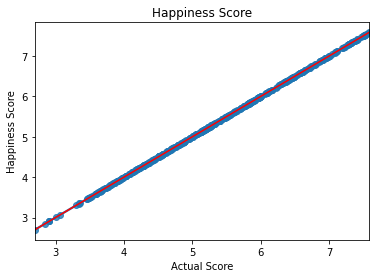

In [90]:
sns.regplot(x=df_model_testing['Happiness Score'],y=df_model_testing['Happiness Score'])

m, b = np.polyfit(predicted_y, y, 1) #This is for 

plt.plot(predicted_y, (m * predicted_y + b), color = 'red')

plt.xlabel('Actual Score')
plt.ylabel('Happiness Score')
plt.title('Happiness Score')
plt.show()

<b>XGBoosting

In [91]:
from xgboost.sklearn import XGBRegressor

In [92]:
xgb = XGBRegressor()

In [93]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
xgb.score(X,y)

0.999997528058891

In [95]:
xgb_predict_y = xgb.predict(X)

In [96]:
df_model_testing['Predicted Happiness Score_XGB'] = np.round(xgb_predict_y,3)

In [97]:
df_model_testing.head()

Happiness Score  Predicted Happiness Score  Predicted Happiness Score_XGB
0            7.587                      7.587                          7.586
1            7.561                      7.561                          7.561
2            7.527                      7.527                          7.527
3            7.522                      7.522                          7.522
4            7.427                      7.427                          7.428

There is some difference in XGBoosting Predicted values


<b>Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
gbr = GradientBoostingRegressor()

In [100]:
gbr.fit(X,y)

GradientBoostingRegressor()

In [101]:
gbr_predict_y = gbr.predict(X)

In [102]:
df_model_testing['Predicted Happiness Score_GBR'] = np.round(gbr_predict_y,3)

In [103]:
df_model_testing.head()

Happiness Score  Predicted Happiness Score  Predicted Happiness Score_XGB  \
0            7.587                      7.587                          7.586   
1            7.561                      7.561                          7.561   
2            7.527                      7.527                          7.527   
3            7.522                      7.522                          7.522   
4            7.427                      7.427                          7.428   

   Predicted Happiness Score_GBR  
0                          7.506  
1                          7.523  
2                          7.480  
3                          7.436  
4                          7.406